In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# ÌÅ¨Î°¨ ÎìúÎùºÏù¥Î≤Ñ ÏÑ∏ÌåÖ
service = Service(ChromeDriverManager().install())
options = Options()
options.add_argument("--window-size=1920x1080")
options.add_argument("--start-maximized")
options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36")
options.add_argument("--lang=ko_KR")

driver = webdriver.Chrome(service=service, options=options)

# ÌÅ¨Î°§ÎßÅÌï† Ïï± URL
app_url = "https://play.google.com/store/apps/details?id=com.fatsecret.android"
driver.get(app_url)
time.sleep(3)

# "Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞" Î≤ÑÌäº ÌÅ¥Î¶≠ (ÏûàÏúºÎ©¥)
try:
    see_all_button = driver.find_element(By.XPATH, "//button[contains(., 'Î¶¨Î∑∞ Î™®Îëê Î≥¥Í∏∞') or contains(., 'See all reviews')]")
    driver.execute_script("arguments[0].click();", see_all_button)
    time.sleep(3)
except:
    print("Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞ Î≤ÑÌäº ÏóÜÏùå")

# Î¶¨Î∑∞ ÏàòÏßë
reviews = []
scroll_count = 0
max_scroll = 20  # Ïä§ÌÅ¨Î°§ ÌöüÏàò Ï°∞Ï†ï Í∞ÄÎä•

while scroll_count < max_scroll:
    review_blocks = driver.find_elements(By.CSS_SELECTOR, "div.RHo1pe")  # Î¶¨Î∑∞ Ï†ÑÏ≤¥ Î∏îÎ°ù
    for block in review_blocks:
        try:
            # ÏûëÏÑ±Ïûê
            try:
                author = block.find_element(By.CSS_SELECTOR, "div.X5PpBb").text.strip()
            except:
                author = "ÏûëÏÑ±Ïûê ÏóÜÏùå"

            # Î≥ÑÏ†ê (aria-label ÌôúÏö©)
            try:
                rating_elem = block.find_element(By.CSS_SELECTOR, "div.iXRFPc")
                rating_text = rating_elem.get_attribute("aria-label")  # Ïòà: "Î≥ÑÌëú 5Í∞ú ÎßåÏ†êÏóê 1Í∞úÎ•º Î∞õÏïòÏäµÎãàÎã§."
            except:
                rating_text = "Î≥ÑÏ†ê ÏóÜÏùå"

            # ÎÇ†Ïßú
            try:
                date = block.find_element(By.CSS_SELECTOR, "span.bp9Aid").text.strip()
            except:
                date = "ÎÇ†Ïßú ÏóÜÏùå"

            # Î¶¨Î∑∞ ÎÇ¥Ïö©
            try:
                content = block.find_element(By.CSS_SELECTOR, "div.h3YV2d").text.strip()
            except:
                content = "Î¶¨Î∑∞ ÎÇ¥Ïö© ÏóÜÏùå"

            review_data = {
                "author": author,
                "rating": rating_text,
                "date": date,
                "content": content
            }

            if review_data not in reviews:
                reviews.append(review_data)

        except Exception as e:
            continue

    # Ïä§ÌÅ¨Î°§ Îã§Ïö¥
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    scroll_count += 1
    print(reviews)
print(f"ÏàòÏßëÎêú Î¶¨Î∑∞ Í∞úÏàò: {len(reviews)}")

# CSV Ï†ÄÏû•
with open("fatsecret_playstore_reviews_full.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["author", "rating", "date", "content"])
    writer.writeheader()
    for r in reviews:
        writer.writerow(r)

driver.quit()


[{'author': 'Ï†ïÏÉÅÏùÄ', 'rating': 'Î≥ÑÌëú 5Í∞ú ÎßåÏ†êÏóê 5Í∞úÎ•º Î∞õÏïòÏäµÎãàÎã§.', 'date': '2025ÎÖÑ 9Ïõî 19Ïùº', 'content': '1. ÏóëÏÖÄÎ°ú Îç∞Ïù¥ÌÑ∞ ÎÇ¥Î†§Î∞õÎäî Í∏∞Îä•Ïù¥ ÏóÜÏñ¥ÏÑú Î∂àÌé∏Ìï©ÎãàÎã§. 2. ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Í∏∞Îä•Ïù¥ ÏóÜÏñ¥ÏÑú, ÏãúÍ∞ÑÎÇ†Îïå ÏßÅÏ†ë ÏòÆÍ≤®Ï†ÅÍ≥†ÏûàÏäµÎãàÎã§. ÏùºÏùºÍ∏∞Î°ùÏãú ÏµúÏÉÅÎã®Ïóê ÎÇòÏò§Îäî "Ìë∏ÎìúÎã§Ïù¥Ïñ¥Î¶¨ ÏòÅÏñëÏ†ïÎ≥¥ ÏàúÏÑú(ÎÇòÌä∏Î•®, ÏÑ§ÌÉï, ÌÉÑÏàòÌôîÎ¨º, Îã®Î∞±Ïßà Îì±)"Í∞Ä PCÏõπÎ≤ÑÏ†ÑÍ≥º Î™®Î∞îÏùºAPPÍ∞ÑÏóê Î∞∞ÏπòÍ∞Ä Îã¨ÎùºÏÑú Îß§Ïö∞ Î∂àÌé∏Ìï©ÎãàÎã§. 3. Î™®Î∞îÏùºÏóêÏÑúÎäî ÎÇòÏ§ëÏóê ÏûÖÎ†•Ìïú ÏùåÏãùÏù¥ Îß®ÏïÑÎûòÏóê ÎÇòÌÉÄÎÇ©ÎãàÎã§. Í∑∏Îü∞Îç∞ PCÏõπÎ≤ÑÏ†ÑÏóêÏÑúÎäî Îß®ÏúÑÏóê ÏûÖÎ†•Îê©ÎãàÎã§. ÏßÑÏßú Î∂àÌé∏Ìï©ÎãàÎã§. PCÏõπÎ≤ÑÏ†ÑÏù¥ ÏûàÎäî ÎçïÎ∂ÑÏóê, ÏÇ¨Î¨¥Ïã§ÏóêÏÑú ÏÉùÍ∞ÅÎÇ†Îïå Ï†ÅÏùÑ Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏäµÎãàÎã§. ÌïòÏßÄÎßå Ïï±Í≥º PCÏõπÎ≤ÑÏ†Ñ ÏÇ¨Ïö©ÌôòÍ≤ΩÏùÑ ÌÜµÏùºÏãúÏºúÏ£ºÏÑ∏Ïöî. 4. Í∑∏Î¶¨Í≥† Î™®Î∞îÏùºÏï± Ïì∏Îç∞ÏóÜÎäî ÌåùÏóÖ ÎùÑÏö∞ÏßÄÎßêÍ≥† Î©îÏÑ∏ÏßÄÍ∞ôÏùÄÍ≤ÉÎèÑ ÎÑ£ÏßÄÎßàÏÑ∏Ïöî. Î©îÏÑ∏ÏßÄ Ïú†Ïö©ÌïòÏßÄÍ≥†ÏïäÍ≥† ÎàÑÍ∞ÄÎ¥ÖÎãàÍπå. Í∂ÅÍ∏àÌï†Îïå

In [10]:
# =========================
# ÏãùÎã®Í¥ÄÎ¶¨ Í≤ΩÏüÅÏÇ¨ Î¶¨Î∑∞ Î∂ÑÏÑù (ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ìè¨Ìï®)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# üîπ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞: ÎßëÏùÄ Í≥†Îîï / Mac: AppleGothic / Linux: ÎÇòÎàîÍ≥†Îîï)
plt.rcParams['font.family'] = 'Malgun Gothic'   # ÏúàÎèÑÏö∞
# plt.rcParams['font.family'] = 'AppleGothic'   # Îß•
# plt.rcParams['font.family'] = 'NanumGothic'   # Î¶¨ÎàÖÏä§ (ÏÑ§ÏπòÎêú Í≤ΩÏö∞)
plt.rcParams['axes.unicode_minus'] = False      # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# 1. Ïó¨Îü¨ Ïù∏ÏΩîÎî© ÏãúÎèÑ Ìï®Ïàò
def smart_read_csv(path):
    for enc in ["utf-8-sig", "utf-8", "cp949", "euc-kr"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    raise ValueError(f"ÌååÏùº ÏùΩÍ∏∞ Ïã§Ìå®: {path}")

# 2. ÌååÏùº Î™©Î°ù
files = [
    "fatsecret_playstore_reviews_full 1-2.csv",
    "fatsecret_playstore_reviews_full 2.csv",
    "fatsecret_playstore_reviews_full 3.csv",
    "YAZIO_playstore_reviews_full 1.csv",
    "YAZIO_playstore_reviews_full 2.csv",
    "YAZIO_playstore_reviews_full 3.csv",
    "Ïù∏ÏïÑÏõÉ_playstore_reviews_full.csv",
    "Ïù∏ÏïÑÏõÉ_playstore_reviews_full1.csv",
    "Ïù∏ÏïÑÏõÉ_playstore_reviews_full2.csv"
]

# 3. Î∂àÎü¨Ïò§Í∏∞ + Ïï± Ïù¥Î¶Ñ ÌÉúÍπÖ
dfs = []
for f in files:
    df = smart_read_csv(f)
    df["app"] = "YAZIO" if "YAZIO" in f else "FatSecret" if "fatsecret" in f.lower() else "Ïù∏ÏïÑÏõÉ"
    dfs.append(df)

raw = pd.concat(dfs, ignore_index=True)

# 4. Î≥ÑÏ†ê Ïà´Ïûê Ï∂îÏ∂ú
def extract_rating(s):
    if not isinstance(s, str): return np.nan
    m = re.search(r"ÎßåÏ†êÏóê\s*([0-5])Í∞ú", s)
    if m: return float(m.group(1))
    m = re.search(r"([0-5])\s*Í∞ú", s)
    if m: return float(m.group(1))
    try: return float(s)
    except: return np.nan

raw["rating_num"] = raw["rating"].map(extract_rating)

# 5. ÎÇ†Ïßú Ï≤òÎ¶¨
def parse_date(s):
    if not isinstance(s, str): return pd.NaT
    m = re.match(r"(\d{4})ÎÖÑ\s*(\d{1,2})Ïõî\s*(\d{1,2})Ïùº", s)
    if m:
        y, mo, d = map(int, m.groups())
        return pd.Timestamp(year=y, month=mo, day=d)
    return pd.to_datetime(s, errors="coerce")

raw["date"] = raw["date"].map(parse_date)
raw["month"] = raw["date"].dt.to_period("M")

# 6. Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò
kw = {
    "Î°úÍ∑∏Ïù∏/Í≥ÑÏ†ï": ["Î°úÍ∑∏Ïù∏","Í≥ÑÏ†ï","Ïù∏Ï¶ù","ÎπÑÎ∞ÄÎ≤àÌò∏","password","login"],
    "Í≤∞Ï†ú/Íµ¨ÎèÖ": ["Í≤∞Ï†ú","Íµ¨ÎèÖ","ÌôòÎ∂à","subscription","premium"],
    "Î≤ÑÍ∑∏/Ïò§Î•ò": ["Î≤ÑÍ∑∏","Ïò§Î•ò","ÏóêÎü¨","error","crash","Î©àÏ∂§","Í∞ïÏ†úÏ¢ÖÎ£å"],
    "ÏÜçÎèÑ/ÏÑ±Îä•": ["ÎäêÎ†§","ÏÜçÎèÑ","Î†â","lag","ÎäêÎ¶ΩÎãàÎã§"],
    "UI/UX": ["Î∂àÌé∏","UI","UX","Î©îÎâ¥","ÎîîÏûêÏù∏","Î≤ÑÌäº"],
    "Îç∞Ïù¥ÌÑ∞/ÎèôÍ∏∞Ìôî": ["ÎèôÍ∏∞Ìôî","Îç∞Ïù¥ÌÑ∞","Í∏∞Î°ù","Î∞±ÏóÖ","Ïó∞Îèô","sync"],
    "Í∏∞Îä•ÏöîÏ≤≠": ["Ï∂îÍ∞Ä","ÏõêÌï¥","Ìï¥Ï£ºÏÑ∏Ïöî","feature","request"],
    "Ïπ≠Ï∞¨/ÎßåÏ°±": ["Ï¢ãÏïÑÏöî","ÏµúÍ≥†","ÌõåÎ•≠","Í∞êÏÇ¨","excellent","love"],
    "Î∂àÎßå/Ïã§Îßù": ["Ïã§Îßù","Î≥ÑÎ°ú","ÏµúÏïÖ","Ïì∞Î†àÍ∏∞","terrible","hate"]
}

def label_category(text):
    if not isinstance(text, str): return np.nan
    for cat, kws in kw.items():
        for k in kws:
            if k.lower() in text.lower():
                return cat
    return np.nan

raw["category"] = raw["content"].map(label_category)

# 7. ÏßëÍ≥Ñ
overview = raw.groupby("app").agg(
    reviews=("content","count"),
    avg_rating=("rating_num","mean")
).reset_index()

cat_counts = raw.groupby(["app","category"]).size().reset_index(name="count")

# 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.boxplot(data=raw, x="app", y="rating_num")
plt.title("Ïï±Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=raw, x="rating_num", hue="app")
plt.title("Ïï±Î≥Ñ Î≥ÑÏ†ê Î∂ÑÌè¨")
plt.show()

plt.figure(figsize=(12,6))
cat_pivot = cat_counts.pivot(index="category", columns="app", values="count").fillna(0)
cat_pivot.plot(kind="bar", figsize=(12,6))
plt.title("Ïï±Î≥Ñ Ïù¥Ïäà Ïπ¥ÌÖåÍ≥†Î¶¨ Ïñ∏Í∏â Ïàò")
plt.show()

# 9. Í≤∞Í≥º Ï∂úÎ†•
print("=== Ïï±Î≥Ñ Î¶¨Î∑∞ Í∞úÏöî ===")
print(overview)

print("\n=== Ïï±Î≥Ñ Ï£ºÏöî Ïπ¥ÌÖåÍ≥†Î¶¨ ===")
print(cat_counts.sort_values(["app","count"], ascending=[True,False]).groupby("app").head(5))


ValueError: ÌååÏùº ÏùΩÍ∏∞ Ïã§Ìå®: Ïù∏ÏïÑÏõÉ_playstore_reviews_full.csv

In [9]:
import plotly.express as px
import plotly.io as pio

# Plotly Î†åÎçîÎü¨ ÏÑ§Ï†ï (ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏûêÎèô ÏãúÎèÑ)
try:
    pio.renderers.default = "plotly_mimetype"   # JupyterLab
except Exception:
    pio.renderers.default = "notebook_connected"  # ÏùºÎ∞ò ÎÖ∏Ìä∏Î∂Å ÌôòÍ≤Ω

# cat_countsÍ∞Ä Ïù¥ÎØ∏ ÏûàÏùå (columns = ['app','category','count'])
# ÏóÜÎã§Î©¥ ÏïÑÎûò Ìïú Ï§ÑÎ°ú Îã§Ïãú ÎßåÎì§Î©¥ Îê®:
# cat_counts = raw.groupby(["app","category"]).size().reset_index(name="count")

# Plotly Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Î™®Îì† Ïπ¥ÌÖåÍ≥†Î¶¨)
fig = px.bar(
    cat_counts,
    x="count",
    y="category",
    color="app",
    orientation="h",
    text="count",
    barmode="group",
    title="Ïï±Î≥Ñ Ïù¥Ïäà Ïπ¥ÌÖåÍ≥†Î¶¨ Ïñ∏Í∏â Ïàò (Ïπ≠Ï∞¨/ÎßåÏ°± Ï†úÏô∏, Ï†ÑÏ≤¥ Ïπ¥ÌÖåÍ≥†Î¶¨)"
)

fig.update_layout(
    xaxis_title="Ïñ∏Í∏â ÌöüÏàò",
    yaxis_title="Ïù¥Ïäà Ïπ¥ÌÖåÍ≥†Î¶¨",
    legend_title="Ïï±",
    yaxis=dict(categoryorder="total ascending"),   # Ïñ∏Í∏â Ïàò Ïàú Ï†ïÎ†¨
    font=dict(family="Malgun Gothic")              # ÏúàÎèÑÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏
)
fig.update_traces(textposition="outside")

# Í∑∏ÎûòÌîÑ ÌëúÏãú
fig.show()

# Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Ïó¥Í≥† Ïã∂ÏúºÎ©¥ ÏïÑÎûò ÏΩîÎìú ÏÇ¨Ïö©
# fig.show(renderer="browser")

# HTML ÌååÏùºÎ°ú Ï†ÄÏû• (ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Ïïà Îú∞ Îïå ÎåÄÎπÑ)
fig.write_html("all_categories_plot.html", include_plotlyjs="cdn")
print("‚úÖ Î™®Îì† Ïπ¥ÌÖåÍ≥†Î¶¨ Plotly Í∑∏ÎûòÌîÑÎ•º all_categories_plot.html ÌååÏùºÎ°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

NameError: name 'cat_counts' is not defined

In [1]:
import os
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ‚úÖ 1. ÎìúÎùºÏù¥Î≤Ñ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Ï°¥Ïû¨ ÌôïÏù∏
CHROMEDRIVER_PATH = "C:\\Users\\ÏÇ¨Ïö©ÏûêÏù¥Î¶Ñ\\Desktop\\chromedriver.exe"  # üëà Î∞òÎìúÏãú Î≥∏Ïù∏ Í≤ΩÎ°úÎ°ú ÏàòÏ†ï

if not os.path.isfile(CHROMEDRIVER_PATH):
    print(f"‚ùå ÏóêÎü¨: Ìï¥Îãπ Í≤ΩÎ°úÏóê chromedriver.exe ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {CHROMEDRIVER_PATH}")
    exit()

# ‚úÖ 2. Selenium ÎìúÎùºÏù¥Î≤Ñ ÏòµÏÖò ÏÑ§Ï†ï
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--window-size=1920x1080")
options.add_argument("--lang=ko_KR")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--disable-extensions")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument('--no-proxy-server')
options.add_argument('--disable-popup-blocking')
options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36")

# ‚úÖ 3. ÎìúÎùºÏù¥Î≤Ñ Ïã§Ìñâ
service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service, options=options)

# ‚úÖ 4. ÌÅ¨Î°§ÎßÅ ÏãúÏûë
app_url = "https://play.google.com/store/apps/details?id=com.fatsecret.android"
driver.get(app_url)
time.sleep(3)

# ‚úÖ 5. Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠
try:
    see_all_button = driver.find_element(By.XPATH, "//button[contains(., 'Î¶¨Î∑∞ Î™®Îëê Î≥¥Í∏∞') or contains(., 'See all reviews')]")
    driver.execute_script("arguments[0].click();", see_all_button)
    time.sleep(3)
except:
    print("‚ùó Î¶¨Î∑∞ Ï†ÑÏ≤¥Î≥¥Í∏∞ Î≤ÑÌäº ÏóÜÏùå")

# ‚úÖ 6. Ïä§ÌÅ¨Î°§ ÎåÄÏÉÅ div Î°úÎî© ÎåÄÍ∏∞
try:
    scrollable_div = WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.fys1fd"))
    )
except:
    print("‚ùå Î¶¨Î∑∞ Ïä§ÌÅ¨Î°§ ÏòÅÏó≠(div.fys1fd)ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    driver.quit()
    exit()

# ‚úÖ 7. Î¶¨Î∑∞ ÏàòÏßë
reviews = []
review_ids = set()
scroll_count = 0
max_scroll = 200
scroll_pause = 3
last_count = 0
no_change = 0
max_no_change = 10

while scroll_count < max_scroll:
    # ‚ñ∂Ô∏è ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠
    try:
        more_buttons = driver.find_elements(By.XPATH, "//span[text()='ÎçîÎ≥¥Í∏∞' or text()='More']")
        for btn in more_buttons:
            try:
                driver.execute_script("arguments[0].click();", btn)
                time.sleep(0.5)
            except:
                continue
    except:
        pass

    # üì• Î¶¨Î∑∞ ÏàòÏßë
    review_blocks = driver.find_elements(By.CSS_SELECTOR, "div.RHo1pe")
    for block in review_blocks:
        try:
            author = block.find_element(By.CSS_SELECTOR, "div.X5PpBb").text.strip()
        except:
            author = "ÏûëÏÑ±Ïûê ÏóÜÏùå"

        try:
            rating_elem = block.find_element(By.CSS_SELECTOR, "div.iXRFPc")
            rating_text = rating_elem.get_attribute("aria-label")
        except:
            rating_text = "Î≥ÑÏ†ê ÏóÜÏùå"

        try:
            date = block.find_element(By.CSS_SELECTOR, "span.bp9Aid").text.strip()
        except:
            date = "ÎÇ†Ïßú ÏóÜÏùå"

        try:
            content = block.find_element(By.CSS_SELECTOR, "div.h3YV2d").text.strip()
        except:
            content = "Î¶¨Î∑∞ ÎÇ¥Ïö© ÏóÜÏùå"

        review_key = f"{author}_{date}_{content[:30]}"
        if review_key not in review_ids:
            reviews.append({
                "author": author,
                "rating": rating_text,
                "date": date,
                "content": content
            })
            review_ids.add(review_key)

    # ‚¨áÔ∏è Ïä§ÌÅ¨Î°§ ÎÇ¥Î¶¨Í∏∞
    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_div)
    time.sleep(scroll_pause)

    # Ï¢ÖÎ£å Ï°∞Í±¥ Ï≤¥ÌÅ¨
    if len(reviews) == last_count:
        no_change += 1
    else:
        no_change = 0
    last_count = len(reviews)

    scroll_count += 1
    print(f"üîÅ {scroll_count}Ìöå Ïä§ÌÅ¨Î°§ | ÎàÑÏ†Å Î¶¨Î∑∞: {len(reviews)}Í∞ú")

    if no_change >= max_no_change:
        print("üõë Î¶¨Î∑∞ Ïàò Ï¶ùÍ∞Ä ÏóÜÏùå. Ï¢ÖÎ£åÌï©ÎãàÎã§.")
        break

# ‚úÖ 8. Ï†ÄÏû•
filename = "fatsecret_reviews_cleaned.csv"
with open(filename, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["author", "rating", "date", "content"])
    writer.writeheader()
    for r in reviews:
        writer.writerow(r)

print(f"\n‚úÖ ÏµúÏ¢Ö ÏàòÏßë Î¶¨Î∑∞ Ïàò: {len(reviews)}Í∞ú")
print(f"üìÅ Ï†ÄÏû• ÏôÑÎ£å: {filename}")
driver.quit()


‚ùå ÏóêÎü¨: Ìï¥Îãπ Í≤ΩÎ°úÏóê chromedriver.exe ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: C:\Users\ÏÇ¨Ïö©ÏûêÏù¥Î¶Ñ\Desktop\chromedriver.exe


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


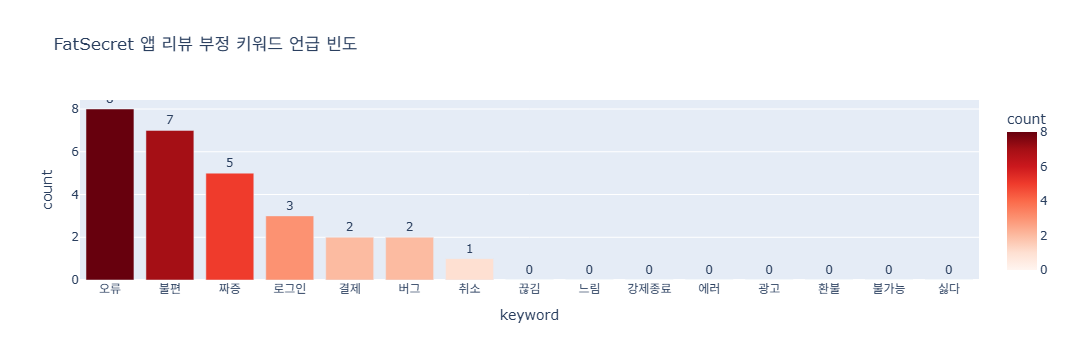

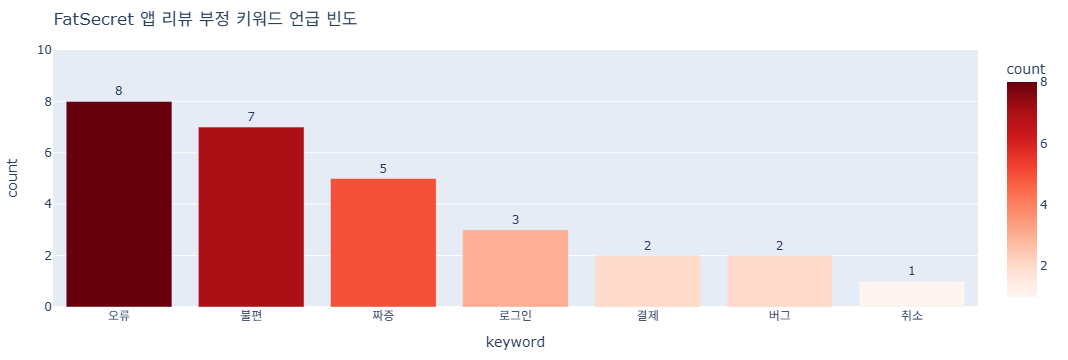

In [3]:
import pandas as pd
import re
import plotly.express as px

# 1. ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "fatsecret_playstore_reviews_full 3.xlsx"
df = pd.read_excel(file_path, sheet_name="fatsecret_playstore_reviews_ful")

# 2. ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
df["content"] = df["content"].astype(str).str.strip()

# 3. Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò
neg_keywords = [
    "Ïò§Î•ò", "ÏóêÎü¨", "Î∂àÌé∏", "Î≤ÑÍ∑∏", "Í∞ïÏ†úÏ¢ÖÎ£å",
    "ÎäêÎ¶º", "ÎÅäÍπÄ", "Î°úÍ∑∏Ïù∏", "Í¥ëÍ≥†", "Í≤∞Ï†ú",
    "Ï∑®ÏÜå", "ÌôòÎ∂à", "Î∂àÍ∞ÄÎä•", "Ïã´Îã§", "ÏßúÏ¶ù"
]

# 4. Í∞Å Î¶¨Î∑∞ÏóêÏÑú ÌÇ§ÏõåÎìú Îì±Ïû• ÌöüÏàò Ïπ¥Ïö¥Ìä∏
for kw in neg_keywords:
    df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))

# 5. ÌÇ§ÏõåÎìúÎ≥Ñ Ï¥ùÌï© ÏßëÍ≥Ñ
neg_counts = df[neg_keywords].sum().sort_values(ascending=False)

# 6. 0 Ïù¥ÏÉÅÎßå ÌïÑÌÑ∞ÎßÅ
neg_df = neg_counts[neg_counts > 0].reset_index()
neg_df.columns = ["keyword", "count"]

# 7. Plotly ÏãúÍ∞ÅÌôî (yÏ∂ï Ïó¨Ïú† Í≥µÍ∞Ñ ÌôïÎ≥¥)
fig = px.bar(
    neg_df,
    x="keyword",
    y="count",
    title="FatSecret Ïï± Î¶¨Î∑∞ Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ïñ∏Í∏â ÎπàÎèÑ",
    text="count",
    color="count",
    color_continuous_scale="Reds"
)

# Ïà´Ïûê ÌëúÏãúÎäî ÎßâÎåÄ ÏúÑÏóê, ÏûòÎ¶º Î∞©ÏßÄÎ•º ÏúÑÌï¥ yÏ∂ï Î≤îÏúÑ ÎäòÎ¶º
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, neg_df["count"].max() + 2]),
    margin=dict(t=50, b=50, l=50, r=80)
)

fig.show()


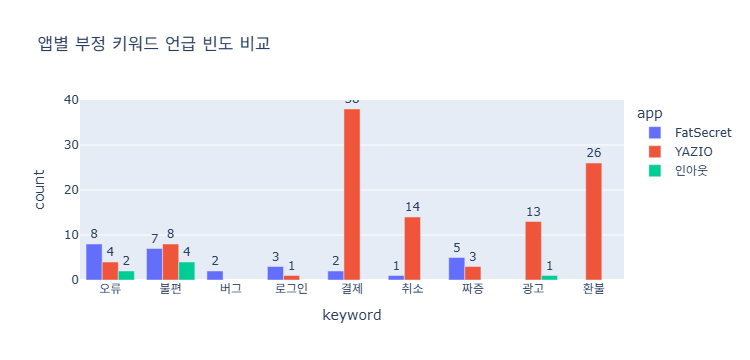

In [4]:
import pandas as pd
import re
import plotly.express as px

# 1. ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "Ïù∏ÏïÑÏõÉ": "Ïù∏ÏïÑÏõÉ_playstore_reviews_full2.xlsx"
}

# 2. Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò
neg_keywords = [
    "Ïò§Î•ò", "ÏóêÎü¨", "Î∂àÌé∏", "Î≤ÑÍ∑∏", "Í∞ïÏ†úÏ¢ÖÎ£å",
    "ÎäêÎ¶º", "ÎÅäÍπÄ", "Î°úÍ∑∏Ïù∏", "Í¥ëÍ≥†", "Í≤∞Ï†ú",
    "Ï∑®ÏÜå", "ÌôòÎ∂à", "Î∂àÍ∞ÄÎä•", "Ïã´Îã§", "ÏßúÏ¶ù"
]

# 3. Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
app_results = []

# 4. Í∞Å Ïï±Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
for app_name, path in files.items():
    # ÌååÏùº Ïó¥Í∏∞
    xls = pd.ExcelFile(path)
    df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
    
    # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
    df["content"] = df["content"].astype(str).str.strip()
    
    # ÌÇ§ÏõåÎìú Ïπ¥Ïö¥Ìä∏
    for kw in neg_keywords:
        df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))
    
    # ÌÇ§ÏõåÎìúÎ≥Ñ Ìï©Í≥Ñ
    counts = df[neg_keywords].sum()
    counts = counts[counts > 0]  # 0Ïù∏ ÌÇ§ÏõåÎìú Ï†úÍ±∞
    
    # Í≤∞Í≥º Ï†ÄÏû•
    for kw, cnt in counts.items():
        app_results.append({"app": app_name, "keyword": kw, "count": cnt})

# 5. Í≤∞Í≥º DataFrame Î≥ÄÌôò
result_df = pd.DataFrame(app_results)

# 6. Plotly ÏãúÍ∞ÅÌôî
fig = px.bar(
    result_df,
    x="keyword",
    y="count",
    color="app",
    barmode="group",
    title="Ïï±Î≥Ñ Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ïñ∏Í∏â ÎπàÎèÑ ÎπÑÍµê",
    text="count"
)

# 7. Ïà´ÏûêÍ∞Ä ÏûòÎ¶¨ÏßÄ ÏïäÍ≤å yÏ∂ï Î≤îÏúÑ ÌôïÏû•
fig.update_traces(textposition="outside")
fig.update_layout(yaxis=dict(range=[0, result_df["count"].max() + 2]))

fig.show()



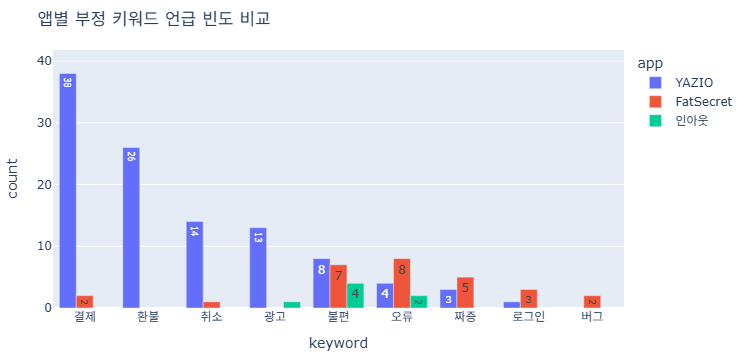

In [5]:
import pandas as pd
import re
import plotly.express as px

# 1. ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "Ïù∏ÏïÑÏõÉ": "Ïù∏ÏïÑÏõÉ_playstore_reviews_full2.xlsx"
}

# 2. Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò
neg_keywords = [
    "Ïò§Î•ò", "ÏóêÎü¨", "Î∂àÌé∏", "Î≤ÑÍ∑∏", "Í∞ïÏ†úÏ¢ÖÎ£å",
    "ÎäêÎ¶º", "ÎÅäÍπÄ", "Î°úÍ∑∏Ïù∏", "Í¥ëÍ≥†", "Í≤∞Ï†ú",
    "Ï∑®ÏÜå", "ÌôòÎ∂à", "Î∂àÍ∞ÄÎä•", "Ïã´Îã§", "ÏßúÏ¶ù"
]

# 3. Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
app_results = []

# 4. Í∞Å Ïï±Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
for app_name, path in files.items():
    xls = pd.ExcelFile(path)
    df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
    df["content"] = df["content"].astype(str).str.strip()
    
    # ÌÇ§ÏõåÎìú Ïπ¥Ïö¥Ìä∏
    for kw in neg_keywords:
        df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x)))
    
    counts = df[neg_keywords].sum()
    counts = counts[counts > 0]  # 0 Ï†úÍ±∞
    
    for kw, cnt in counts.items():
        app_results.append({"app": app_name, "keyword": kw, "count": cnt})

# 5. DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
result_df = pd.DataFrame(app_results)
result_df = result_df.sort_values(by="count", ascending=False)

# 6. Ïà´Ïûê Ï∂ïÏïΩ Ìï®Ïàò
def shorten_number(num):
    if num >= 1000000:
        return f"{num/1000000:.1f}M"
    elif num >= 1000:
        return f"{num/1000:.1f}K"
    else:
        return str(num)

result_df["count_short"] = result_df["count"].apply(shorten_number)

# 7. Plotly ÏãúÍ∞ÅÌôî
fig = px.bar(
    result_df,
    x="keyword",
    y="count",
    color="app",
    barmode="group",
    title="Ïï±Î≥Ñ Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ïñ∏Í∏â ÎπàÎèÑ ÎπÑÍµê",
    text="count_short"
)

# 8. Ïà´ÏûêÍ∞Ä Ï∞®Ìä∏ Î∞ñÏúºÎ°ú Ïïà ÎÇòÍ∞ÄÎèÑÎ°ù inside ÏúÑÏπò
fig.update_traces(textposition="inside")

# 9. Ïó¨Î∞± Ï°∞Ï†ï
fig.update_layout(
    yaxis=dict(range=[0, result_df["count"].max() * 1.1]),  # ÏïΩÍ∞Ñ Ïó¨Ïú† Í≥µÍ∞Ñ
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div[fys1fd]"}
  (Session info: chrome=140.0.7339.129); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x57c333+65459]
	GetHandleVerifier [0x0x57c374+65524]
	(No symbol) [0x0x39d973]
	(No symbol) [0x0x3e76e7]
	(No symbol) [0x0x3e7a8b]
	(No symbol) [0x0x42dea2]
	(No symbol) [0x0x409e44]
	(No symbol) [0x0x42b606]
	(No symbol) [0x0x409bf6]
	(No symbol) [0x0x3db38e]
	(No symbol) [0x0x3dc274]
	GetHandleVerifier [0x0x7feda3+2697763]
	GetHandleVerifier [0x0x7f9ec7+2677575]
	GetHandleVerifier [0x0x5a4194+228884]
	GetHandleVerifier [0x0x5949f8+165496]
	GetHandleVerifier [0x0x59b18d+192013]
	GetHandleVerifier [0x0x5847d8+99416]
	GetHandleVerifier [0x0x584972+99826]
	GetHandleVerifier [0x0x56ebea+10346]
	BaseThreadInitThunk [0x0x766a5d49+25]
	RtlInitializeExceptionChain [0x0x7711d6db+107]
	RtlGetAppContainerNamedObjectPath [0x0x7711d661+561]


In [11]:
import plotly.express as px

# Î≥ÑÏ†ê Ïà´Ïûê Ï∂îÏ∂ú
all_reviews["rating_num"] = all_reviews["rating"].str.extract(r"(\d)").astype(float)

# Î≥ÑÏ†ê Î∂ÑÌè¨ ÏßëÍ≥Ñ
rating_counts = all_reviews["rating_num"].value_counts().sort_index().reset_index()
rating_counts.columns = ["rating", "count"]

# Plotly ÎßâÎåÄÍ∑∏ÎûòÌîÑ
fig = px.bar(
    rating_counts,
    x="rating",
    y="count",
    text="count",
    title="Ï§ëÎ≥µ Ï†úÍ±∞Îêú Î¶¨Î∑∞Ïùò Î≥ÑÏ†ê Î∂ÑÌè¨",
    labels={"rating": "Î≥ÑÏ†ê", "count": "Î¶¨Î∑∞ Ïàò"}
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis=dict(dtick=1))

fig.show()


NameError: name 'all_reviews' is not defined

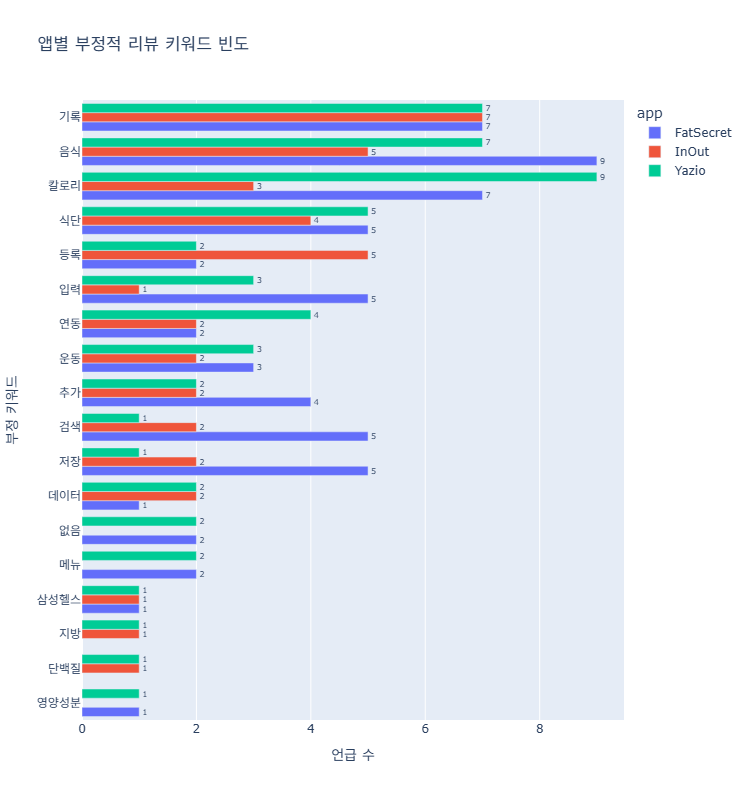

In [3]:
import pandas as pd
import plotly.express as px

# ÌååÏùº Í≤ΩÎ°ú (ÎÑ§Í∞Ä Ïò¨Î¶∞ ÌååÏùº Ïù¥Î¶Ñ Í∑∏ÎåÄÎ°ú ÏßÄÏ†ï)
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "Yazio": "YAZIO_playstore_reviews_full 3.xlsx",
    "InOut": "Ïù∏ÏïÑÏõÉ_playstore_reviews_full2-.xlsx"
}

# Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ (ÏõêÌïòÎäî ÎåÄÎ°ú ÌôïÏû• Í∞ÄÎä•)
negative_keywords = [
    "ÏïàÎê®", "ÏûëÎèô","ÌôîÎ©¥ ",
]

# Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏÑú Ï†ÑÏ≤òÎ¶¨
all_data = []
for app, path in files.items():
    try:
        df = pd.read_excel(path)
        # Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Ïª¨ÎüºÎ™Ö Ï∂îÏ†ï (Î≥¥ÌÜµ 'review', 'content' Îì±) ‚Üí ÏóÜÏúºÎ©¥ ÏßÅÏ†ë ÏàòÏ†ï ÌïÑÏöî
        col = [c for c in df.columns if "review" in c.lower() or "content" in c.lower()]
        if col:
            text_col = col[0]
        else:
            text_col = df.columns[0]  # Ï≤´ Î≤àÏß∏ Ïó¥ÏùÑ ÏûÑÏãúÎ°ú Î¶¨Î∑∞Î°ú Ï≤òÎ¶¨
        df["app"] = app
        df = df[[text_col, "app"]].rename(columns={text_col: "review"})
        all_data.append(df)
    except Exception as e:
        print(f"{app} ÌååÏùº Ï≤òÎ¶¨ Ïò§Î•ò:", e)

reviews = pd.concat(all_data, ignore_index=True)

# Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ïπ¥Ïö¥Ìä∏
counts = []
for app in reviews["app"].unique():
    app_reviews = reviews[reviews["app"] == app]["review"].dropna().astype(str)
    for kw in negative_keywords:
        n = app_reviews.str.contains(kw, case=False).sum()
        if n > 0:  # 0Ìöå Ïñ∏Í∏â ÌÇ§ÏõåÎìúÎäî Ï†úÍ±∞
            counts.append({"app": app, "keyword": kw, "count": n})

df_counts = pd.DataFrame(counts)

# Ï†ïÎ†¨
df_counts = df_counts.sort_values(["app", "count"], ascending=[True, False])

# Plotly ÏãúÍ∞ÅÌôî (Í∞ÄÎ°ú ÎßâÎåÄ)
fig = px.bar(
    df_counts,
    x="count",
    y="keyword",
    color="app",
    orientation="h",
    text="count",
    title="Ïï±Î≥Ñ Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÎπàÎèÑ"
)

fig.update_traces(textposition="inside", insidetextanchor="start")
fig.update_layout(
    xaxis_title="Ïñ∏Í∏â Ïàò",
    yaxis_title="Î∂ÄÏ†ï ÌÇ§ÏõåÎìú",
    yaxis=dict(categoryorder="total ascending"),
    barmode="group",
    height=800
)

fig = px.bar(
    df_counts,
    x="count",
    y="keyword",
    color="app",
    orientation="h",
    text="count",
    title="Ïï±Î≥Ñ Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÎπàÎèÑ"
)

# Ïà´ÏûêÎ•º ÎßâÎåÄ Î∞ñÏóê ÌëúÏãú
fig.update_traces(
    textposition="outside",
    textfont_size=12
)

fig.update_layout(
    xaxis_title="Ïñ∏Í∏â Ïàò",
    yaxis_title="Î∂ÄÏ†ï ÌÇ§ÏõåÎìú",
    yaxis=dict(categoryorder="total ascending"),
    barmode="group",
    height=800
)


fig.show()


C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\pmj96\AppData\Local\Temp\ipykernel_16972\1895784560.py:82: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

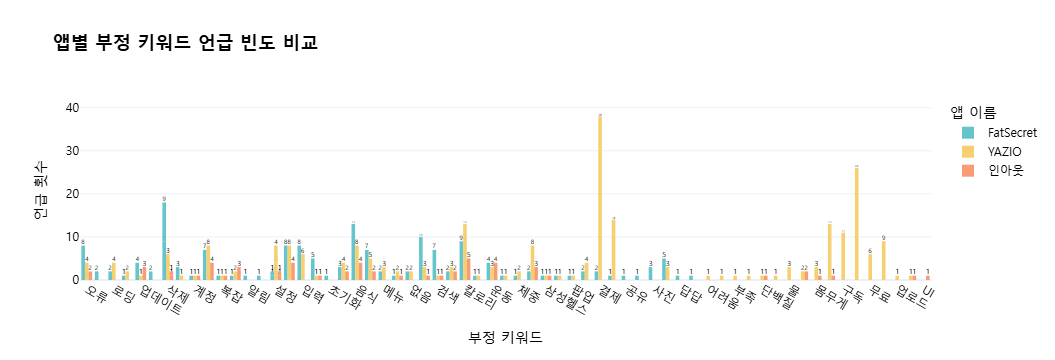

In [4]:
import pandas as pd
import re
import plotly.express as px
import plotly.io as pio

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
pio.templates.default = "plotly_white" # Í∏∞Î≥∏ ÌÖúÌîåÎ¶ø ÏÑ§Ï†ï
# PlotlyÏóê ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö© (ÏãúÏä§ÌÖúÏóê Ìè∞Ìä∏Í∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®)
# Ïòà: WindowsÏùò Í≤ΩÏö∞ 'Malgun Gothic', macOSÏùò Í≤ΩÏö∞ 'AppleGothic'
# fig.update_layout(font_family="Malgun Gothic") Îì±ÏúºÎ°ú Í∞úÎ≥Ñ Ï†ÅÏö© Í∞ÄÎä•

# 1. ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï (Í∞ÄÏÉÅÏùò ÌååÏùº Í≤ΩÎ°úÎ°ú ÎåÄÏ≤¥)
files = {
    "FatSecret": "fatsecret_playstore_reviews_full 3.xlsx",
    "YAZIO": "YAZIO_playstore_reviews_full 3.xlsx",
    "Ïù∏ÏïÑÏõÉ": "Ïù∏ÏïÑÏõÉ_playstore_reviews_full2.xlsx"
}

# 2. ÏãùÎã® Ïñ¥Ìîå Í¥ÄÎ†® Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò
# ÏúÑÏóêÏÑú Ï†úÏïàÎêú ÌÇ§ÏõåÎìúÎ•º Í∏∞Î∞òÏúºÎ°ú Îçî ÏÉÅÏÑ∏ÌïòÍ≤å Íµ¨ÏÑ±
neg_keywords = [
    # ÏùºÎ∞òÏ†ÅÏù∏ Ïï± Î¨∏Ï†ú
    "Ïò§Î•ò", "ÏóêÎü¨", "Î≤ÑÍ∑∏", "Í∞ïÏ†úÏ¢ÖÎ£å", "Î©àÏ∂§", "ÌäïÍπÄ",
    "ÎäêÎ¶º", "Î°úÎî©", "ÎÅäÍπÄ", "Î∞òÏùëÏóÜÏùå", "Î†â",
    "ÏóÖÎç∞Ïù¥Ìä∏", "Ìò∏Ìôò", "ÏÑ§Ïπò", "ÏÇ≠Ï†ú",
    "Î°úÍ∑∏Ïù∏", "ÌöåÏõêÍ∞ÄÏûÖ", "Ïù∏Ï¶ù", "ÌÉàÌá¥", "Í≥ÑÏ†ï", "Ï†ïÎ≥¥Ïú†Ï∂ú",

    # UI/UX Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú
    "Î∂àÌé∏", "Ïñ¥Î†§ÏõÄ", "Î≥µÏû°", "Ìó∑Í∞àÎ¶º", "ÏßÅÍ¥ÄÏ†Å", "ÏÇ¨Ïö©ÏÑ±",
    "ÎîîÏûêÏù∏", "ÌôîÎ©¥", "Î†àÏù¥ÏïÑÏõÉ", "Í∏ÄÏî®", "ÏûëÏùå", "Í∞ÄÎèÖÏÑ±", "UI", "UX",
    "ÏïåÎ¶º", "ÏÜåÎ¶¨", "ÏßÑÎèô", "ÏÑ§Ï†ï",

    # ÏãùÎã®/ÏòÅÏñë Í∏∞Î°ù Î∞è Í¥ÄÎ¶¨ Î¨∏Ï†ú
    "Í∏∞Î°ù", "ÏûÖÎ†•", "Ï†ÄÏû•", "ÎàÑÎùΩ", "ÏÇ¨ÎùºÏßê", "Ï¥àÍ∏∞Ìôî", "ÏÇ≠Ï†ú", "ÏàòÏ†ï",
    "ÏùåÏãù", "ÏãùÎã®", "Î©îÎâ¥", "Îç∞Ïù¥ÌÑ∞", "Î∂ÄÏ°±", "ÏóÜÏùå", "Ï∂îÍ∞Ä", "Í≤ÄÏÉâ", "Îì±Î°ù", "ÏùåÏãùÏ†ê", "Ïô∏Ïãù",
    "ÏπºÎ°úÎ¶¨", "ÏòÅÏñëÏÑ±Î∂Ñ", "ÌÉÑÏàòÌôîÎ¨º", "Îã®Î∞±Ïßà", "ÏßÄÎ∞©", "ÎÇòÌä∏Î•®", "ÎãπÎ•ò", "Ï†ïÌôïÎèÑ", "Ïò§Ï∞®", "ÌãÄÎ¶º",
    "Î¨º", "ÏàòÎ∂Ñ", "Ïö¥Îèô", "ÌôúÎèôÎüâ",

    # Î™©Ìëú Î∞è ÌÜµÍ≥Ñ Í∏∞Îä• Î¨∏Ï†ú
    "Î™©Ìëú", "ÏÑ§Ï†ï", "Î≥ÄÍ≤Ω", "Îã¨ÏÑ±", "Ï≤¥Ï§ë", "Î™∏Î¨¥Í≤å", "Í∞êÎüâ", "Ï¶ùÍ∞Ä", "Ïú†ÏßÄ",
    "Í∑∏ÎûòÌîÑ", "ÌÜµÍ≥Ñ", "Î∂ÑÏÑù", "Î¶¨Ìè¨Ìä∏", "Î≥¥Í≥†ÏÑú", "ÏãúÍ∞ÅÌôî",

    # Ïó∞Îèô/Í∏∞Í∏∞ Î¨∏Ï†ú
    "Ïó∞Îèô", "ÎØ∏Î∞¥Îìú", "Ïï†ÌîåÏõåÏπò", "ÏÇºÏÑ±Ìó¨Ïä§", "Ïõ®Ïñ¥Îü¨Î∏î", "Í∏∞Í∏∞",

    # ÌîÑÎ¶¨ÎØ∏ÏóÑ/Í≤∞Ï†ú/Í¥ëÍ≥† Î¨∏Ï†ú
    "Í¥ëÍ≥†", "ÌåùÏóÖ", "ÌîÑÎ¶¨ÎØ∏ÏóÑ", "Í≤∞Ï†ú", "Íµ¨ÎèÖ", "ÌôòÎ∂à", "Ï∑®ÏÜå", "Í∞ÄÍ≤©", "ÎπÑÏåà", "ÌòúÌÉù",
    "Î¨¥Î£å", "Ïú†Î£å", "Ìï†Ïù∏", "Ïø†Ìè∞", "Ïπ¥Îìú", "Í≤∞Ï†úÏò§Î•ò",

    # Ïª§ÎÆ§ÎãàÌã∞/ÏÉÅÌò∏ÏûëÏö© Î¨∏Ï†ú
    "Ïª§ÎÆ§ÎãàÌã∞", "ÏπúÍµ¨", "Í≥µÏú†", "Í≤åÏãúÍ∏Ä", "ÎåìÍ∏Ä", "ÏÇ¨ÏßÑ", "ÏóÖÎ°úÎìú",

    # Í∞êÏ†ïÏ†ÅÏù∏ ÌëúÌòÑ
    "Ïã´Îã§", "ÏßúÏ¶ù", "ÏµúÏïÖ", "Ïã§Îßù", "Î∂àÎßå", "Ïñ¥Ïù¥ÏóÜÎã§", "ÎãµÎãµ", "ÌôîÎÇ®", "Î≥ÑÎ°ú", "Ìô©Îãπ"
]

# 3. Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
app_results = []

# 4. Í∞Å Ïï±Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
for app_name, path in files.items():
    try:
        # ÌååÏùº Ïó¥Í∏∞
        xls = pd.ExcelFile(path)
        df = pd.read_excel(path, sheet_name=xls.sheet_names[0])
        
        # 'content' Ïª¨ÎüºÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Í±¥ÎÑàÎõ∞Í∏∞
        if 'content' not in df.columns:
            print(f"Í≤ΩÍ≥†: '{app_name}' ÌååÏùºÏóê 'content' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§. Í±¥ÎÑàÎúùÎãàÎã§.")
            continue

        # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
        df["content"] = df["content"].astype(str).str.strip()
        
        # ÌÇ§ÏõåÎìú Ïπ¥Ïö¥Ìä∏
        for kw in neg_keywords:
            # Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©ÌïòÏó¨ ÌÇ§ÏõåÎìú Ïπ¥Ïö¥Ìä∏ (ÎåÄÏÜåÎ¨∏Ïûê Î¨¥Ïãú Î∞è Îã®Ïñ¥ Í≤ΩÍ≥Ñ Ï≤òÎ¶¨)
            # kw = "Ïò§Î•ò", pattern = r'\bÏò§Î•ò\b' -> "Ïò§Î•ò"ÎùºÎäî Îã®Ïñ¥Îßå Îß§Ïπ≠
            # ÌïòÏßÄÎßå ÌïúÍ∏ÄÏùÄ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏóÜÏñ¥ÏÑú Îã®Ïñ¥ Í≤ΩÍ≥Ñ \bÍ∞Ä Ï†úÎåÄÎ°ú ÏûëÎèô Ïïà Ìï† Ïàò ÏûàÏùå.
            # Ïó¨Í∏∞ÏÑúÎäî Îã®ÏàúÌûà Ìè¨Ìï® Ïó¨Î∂ÄÎ°ú Îß§Ïπ≠ÌïòÍ≥†, ÌïÑÏöîÌïú Í≤ΩÏö∞ \s(Í≥µÎ∞±) Îì±ÏùÑ Ï∂îÍ∞Ä Í≥†Î†§.
            # Ïó¨Í∏∞ÏÑúÎäî Îã®ÏàúÌûà kwÎ•º Ìè¨Ìï®ÌïòÎäî Í≤ΩÏö∞Î°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.
            df[kw] = df["content"].apply(lambda x: len(re.findall(kw, x, re.IGNORECASE)))
        
        # ÌÇ§ÏõåÎìúÎ≥Ñ Ìï©Í≥Ñ
        counts = df[neg_keywords].sum()
        counts = counts[counts > 0]  # 0Ïù∏ ÌÇ§ÏõåÎìú Ï†úÍ±∞
        
        # Í≤∞Í≥º Ï†ÄÏû•
        for kw, cnt in counts.items():
            app_results.append({"app": app_name, "keyword": kw, "count": cnt})

    except FileNotFoundError:
        print(f"Ïò§Î•ò: ÌååÏùº '{path}'Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ìï¥Îãπ Ïï± ({app_name})ÏùÄ Í±¥ÎÑàÎúùÎãàÎã§.")
    except Exception as e:
        print(f"'{app_name}' Ïï± Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")


# 5. Í≤∞Í≥º DataFrame Î≥ÄÌôò
result_df = pd.DataFrame(app_results)

# 6. Plotly ÏãúÍ∞ÅÌôî
if not result_df.empty:
    fig = px.bar(
        result_df,
        x="keyword",
        y="count",
        color="app",
        barmode="group",
        title="<b>Ïï±Î≥Ñ Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ïñ∏Í∏â ÎπàÎèÑ ÎπÑÍµê</b>", # Ï†úÎ™© Í∞ïÏ°∞
        text="count",
        labels={"keyword": "Î∂ÄÏ†ï ÌÇ§ÏõåÎìú", "count": "Ïñ∏Í∏â ÌöüÏàò", "app": "Ïï± Ïù¥Î¶Ñ"}, # ÎùºÎ≤® ÌïúÍ∏ÄÌôî
        color_discrete_sequence=px.colors.qualitative.Pastel # ÏÉâÏÉÅ ÌåîÎ†àÌä∏ Î≥ÄÍ≤Ω
    )

    # 7. Ïà´ÏûêÍ∞Ä ÏûòÎ¶¨ÏßÄ ÏïäÍ≤å yÏ∂ï Î≤îÏúÑ ÌôïÏû• Î∞è ÌÖçÏä§Ìä∏ ÏúÑÏπò Ï°∞Ï†ï
    fig.update_traces(textposition="outside", marker_line_width=0) # ÎßâÎåÄ ÌÖåÎëêÎ¶¨ Ï†úÍ±∞
    fig.update_layout(
        yaxis=dict(range=[0, result_df["count"].max() * 1.1]), # yÏ∂ï Î≤îÏúÑ 10% ÌôïÏû•
        hovermode="x unified", # Ìò∏Î≤Ñ Ïãú Ï†ïÎ≥¥ ÌÜµÌï©
        font=dict(family="Malgun Gothic", size=12, color="black"), # Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
        title_font_size=18,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        legend_title_font_size=14
    )

    fig.show()
else:
    print("Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. ÌååÏùº Í≤ΩÎ°ú Î∞è ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

In [9]:
pip install caas_jupyter_tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement caas_jupyter_tools (from versions: none)
ERROR: No matching distribution found for caas_jupyter_tools


In [13]:
import pandas as pd
import re
from konlpy.tag import Okt # ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
from collections import defaultdict
from IPython.display import display

# --- 1. ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è ÌÖçÏä§Ìä∏ Î°úÎìú ---
# ÌååÏùº Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌååÏùº ÏúÑÏπòÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
# ÏòàÏãú: Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂Å ÌååÏùºÍ≥º Í∞ôÏùÄ ÎîîÎ†âÌÜ†Î¶¨Ïóê ÏûàÎã§Î©¥ ÌååÏùº Ïù¥Î¶ÑÎßå ÏÇ¨Ïö©
file1 = "KakaoTalk_20250926_1722_06_896_group.txt"
file2 = "KakaoTalk_20250926_1722_26_392_group.txt"

# ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®Ïàò
def load_text_file(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read()
    except FileNotFoundError:
        print(f"Ïò§Î•ò: ÌååÏùº '{file_path}'Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        return None
    except Exception as e:
        print(f"ÌååÏùº '{file_path}' ÏùΩÍ∏∞ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        return None

text1 = load_text_file(file1)
text2 = load_text_file(file2)

if text1 is None or text2 is None:
    print("ÌååÏùº Î°úÎìú Ïã§Ìå®. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit() # Ïä§ÌÅ¨Î¶ΩÌä∏ Ï¢ÖÎ£å

combined_text = text1 + "\n" + text2

print("--- ÌååÏùº Î°úÎìú ÏôÑÎ£å ---")
print(f"Ï¥ù ÌÖçÏä§Ìä∏ Í∏∏Ïù¥: {len(combined_text)} Ïûê")

# --- 2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï§ÄÎπÑ ---
okt = Okt()

# --- 3. Ïù¥ÎÑàÏª¨Î¶¨ Î∏åÎûúÎìú ÎßûÏ∂§ Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò ---
# Ïù¥ÎÑàÎ∑∞Ìã∞, Í±¥Í∞ïÏãùÌíà, Ïó¨ÏÑ± Í±¥Í∞ï Ï†úÌíàÍµ∞Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂∞ ÌÇ§ÏõåÎìú Íµ¨ÏÑ±
neg_keywords = [
    # Ï†úÌíà ÏûêÏ≤¥ Î¨∏Ï†ú
    "Ìö®Í≥ºÏóÜ", "Ìö®Í≥º ÏóÜ", "Ìö®Í≥º Î™ª", "Î≥ÄÌôîÏóÜ", "Î≥ÄÌôî ÏóÜ", "Ï∞®Ïù¥ÏóÜ", "Ï∞®Ïù¥ ÏóÜ", # Ìö®Í≥º ÏóÜÏùå
    "ÎπÑÏã∏", "Í∞ÄÍ≤©", "Î∂ÄÎã¥", "Í∞ÄÏÑ±ÎπÑ", # Í∞ÄÍ≤©
    "Î∂àÌé∏", "Î≤àÍ±∞Î°≠", "ÏÑ≠Ï∑®", "Î®πÍ∏∞", # ÏÑ≠Ï∑® Î∂àÌé∏
    "ÎÉÑÏÉà", "ÎßõÏóÜ", "Ïó≠Í≤π", "Í±∞Î∂ÄÍ∞ê", # Îßõ/ÎÉÑÏÉà
    "Î∂ÄÏûëÏö©", "ÏÜçÏì∞Î¶º", "ÏÑ§ÏÇ¨", "ÌîºÎ∂ÄÌä∏Îü¨Î∏î", "ÎëêÎìúÎü¨Í∏∞", "Í∞ÄÎ†µ", "ÏïåÎ†àÎ•¥Í∏∞", "ÏïàÎßû", # Î∂ÄÏûëÏö©
    "ÏÑ±Î∂Ñ", "Î∂àÏïà", "ÏùòÏã¨", "ÏÑ±Î∂ÑÎ¨∏Ï†ú", # ÏÑ±Î∂Ñ Î∂àÏïà
    "ÌíàÏ†à", "Ïû¨Í≥†", "Î∞∞

SyntaxError: unterminated string literal (detected at line 50) (1607028189.py, line 50)